In [5]:
'''source: https://opendata.cbs.nl/statline/portal.html?_la=nl&_catalog=CBS&tableId=71084ned&_theme=444
korte (1-3 overnachtingen) buitenlandse vakanties naar organisatievorm en vervoermiddelen opgenomen.
'''
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

short_hollidays = pd.read_csv("csv/korte_vakanties_buitenland_vervoer.csv", sep = ';')
short_hollidays.dtypes

'''DATA CLEANING - FROM OBJECTS NAAR INT'''

new_colums = ['ID', 'Vakantiekenmerken', 'Perioden','Totaal', 'Auto',
              'Touringcar', 'Vliegtuig','Overig vervoer', 'Niet georganiseerd']

short_hollidays.columns=new_colums

def int_cleaning(df, column_name):
    
    temp_2 = list(df[column_name])
    pattern = '[0-9.]+|[.]'
    temp_3 = list(re.findall(pattern, str(temp_2)))
    temp_4 = [number.replace('.', '0') for number in temp_3]
    df[column_name]= temp_4
    df[column_name]= df[column_name].astype('int')
    return df

def years_cleaning(df, column_name):
    
    temp_2 = list(df[column_name])
    pattern = '[0-9][0-9][0-9][0-9]'
    temp_3 = list(re.findall(pattern, str(temp_2)))
    temp_4 = [number.replace('.', '0') for number in temp_3]
    df[column_name]= temp_4
    df[column_name]= df[column_name].astype('int')
    return df


for el in new_colums[3:]:
    short_hollidays = int_cleaning(short_hollidays, el)
    
short_hollidays = years_cleaning(short_hollidays, 'Perioden')

vak_code = list(short_hollidays.Vakantiekenmerken)

kenmerk_dict = {
                10:"Totaal",40:"Eigen bezit",42:"zomerhuis",43:"caravan",
                44:"boot",45:"Tent",41:"toerist logies",46:"woning familie",
                47:"woning particulier",48:"Hotel",49:"pension",50:"appartement",
                51:"zomerhuisje_2",52:"Tent_2",53:"caravan",54:"caravan_2",55:"boot_2",
                56:"groepsaccommodatie",57:"overig", 
                111:"*België",112:"*Luxemburg",113:"*Frankrijk",114:"*Spanje", 
                115:"*Portugal",116:"*Oostenrijk",117:"*Zwitserland", 
                118:"*Groot-Brittannië",119:"*Noorwegen",120:"*Denemarken", 
                121:"*Duitsland",122:"*Italië",123:"*Griekenland",124:"*Hongarije",
                125:"*Tsjechië",126:"*Turkije",127:"*Egypte",128:"*Verre Oosten", 
                129:"*Verenigde Staten",130:"*Caribisch gebied",131:"*Overige landen"
               }

vak_list = []

for el in vak_code:
    vak_list.append(kenmerk_dict[el])

short_hollidays.Vakantiekenmerken = vak_list
short_hollidays.to_csv('csv/short_hollidays_clean.csv',sep = ';')

In [2]:
short_hollidays


,ID,Vakantiekenmerken,Perioden,Totaal,Auto,Touringcar,Vliegtuig,Overig vervoer,Niet georganiseerd
0,0,Totaal,2002,3585,830,189,360,451,1755
1,1,Totaal,2003,3456,923,241,348,404,1539
2,2,Totaal,2004,3563,1001,201,448,339,1574
3,3,Totaal,2005,3291,998,255,374,294,1369
4,4,Totaal,2006,3229,838,208,456,336,1392
...,...,...,...,...,...,...,...,...,...
595,595,overig,2012,41,0,0,0,0,0
596,596,overig,2013,0,0,0,0,0,0
597,597,overig,2014,0,0,0,0,0,0
598,598,overig,2015,0,0,0,0,0,0


,Auto,Touringcar,Overig vervoer,Vliegtuig
15,344,24,86,0
16,411,24,102,0
17,433,21,109,0
18,441,35,70,0
19,310,30,107,0
...,...,...,...,...
595,0,0,0,0
596,0,0,0,0
597,0,0,0,0
598,0,0,0,0


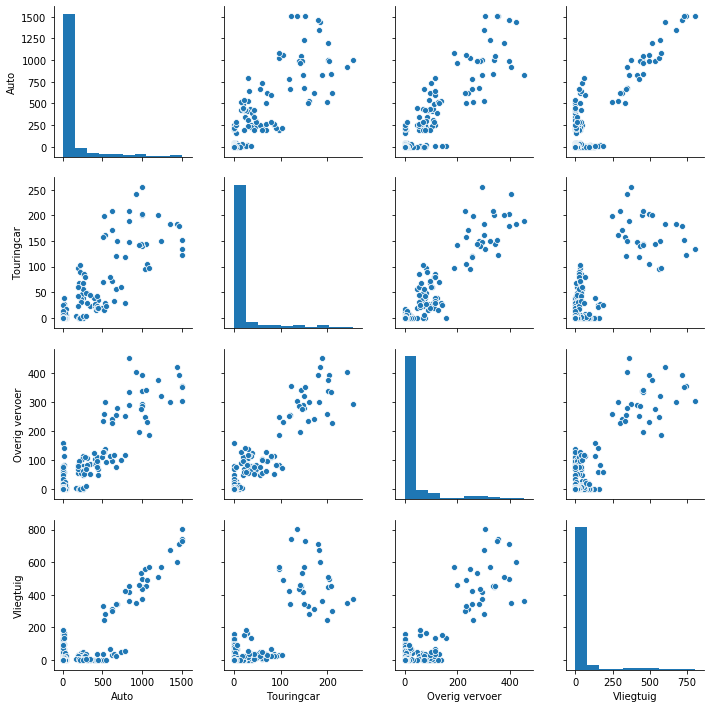

In [35]:
sns.pairplot(short_hollidays[['Auto','Touringcar', 'Overig vervoer', 'Vliegtuig']])
short_hollidays[['Auto','Touringcar', 'Overig vervoer', 'Vliegtuig']]

In [25]:
short_hollidays = short_hollidays[15:]
short_hollidays 

,ID,Vakantiekenmerken,Perioden,Totaal,Auto,Touringcar,Vliegtuig,Overig vervoer,Niet georganiseerd
15,15,*België,2002,1209,344,24,0,86,755
16,16,*België,2003,1239,411,24,0,102,702
17,17,*België,2004,1185,433,21,0,109,622
18,18,*België,2005,1057,441,35,0,70,512
19,19,*België,2006,1031,310,30,0,107,584
...,...,...,...,...,...,...,...,...,...
595,595,overig,2012,41,0,0,0,0,0
596,596,overig,2013,0,0,0,0,0,0
597,597,overig,2014,0,0,0,0,0,0
598,598,overig,2015,0,0,0,0,0,0


In [26]:
#short_hollidays = short_hollidays.groupby('Perioden').sum().reset_index()#.T.reset_index()[2:]
#short_hollidays

In [27]:
#plt.figure(figsize=(9, 9))
#ax = sns.barplot(x= 'Perioden', y='Auto', palette="vlag_r", data=short_hollidays)

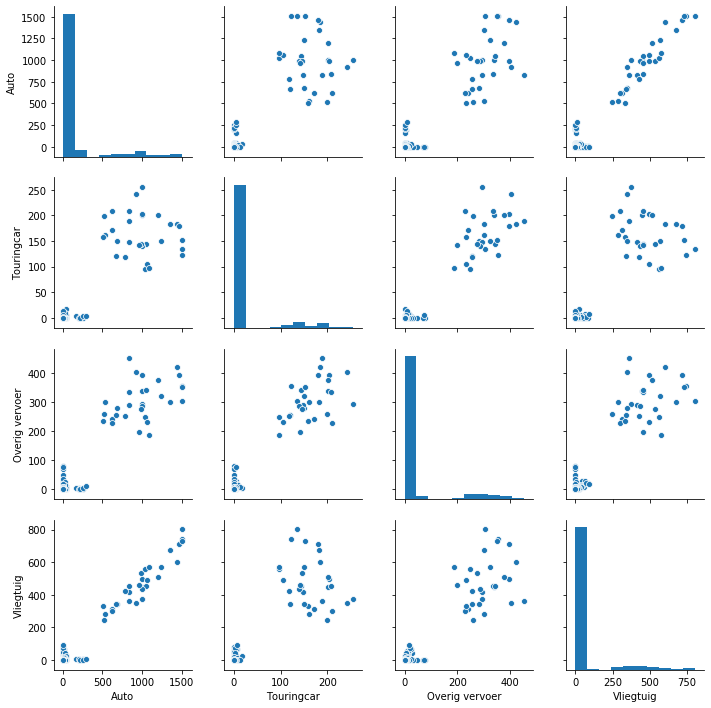

In [34]:
short_hollidays_country= short_hollidays[short_hollidays.Vakantiekenmerken.str.match(pat = '[*]+[A-Za-z]')]
short_hollidays_acitvity = short_hollidays[short_hollidays.Vakantiekenmerken.str.match(pat = '[^*]+')]

short_hollidays_country.corr()[5:6]
short_hollidays_acitvity.corr()[5:6]
sns.pairplot(short_hollidays_acitvity[['Auto','Touringcar', 'Overig vervoer', 'Vliegtuig']])


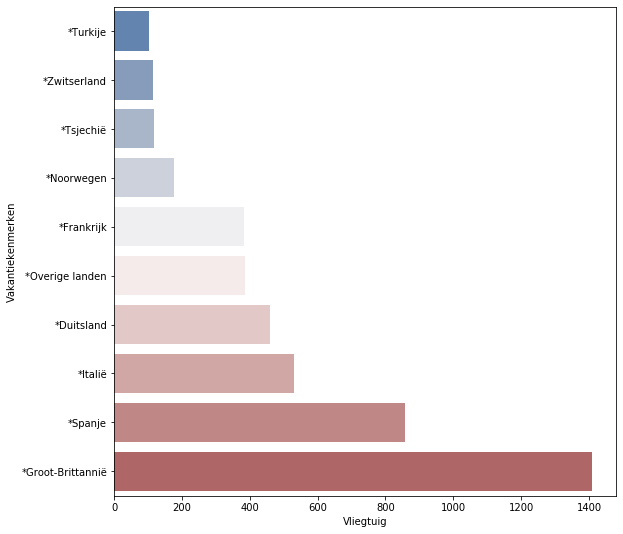

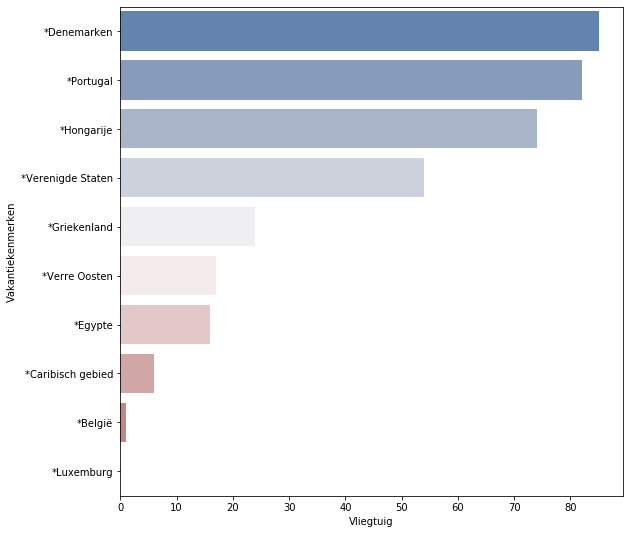

In [29]:
vliegen_top_10 = short_hollidays_country.groupby('Vakantiekenmerken').sum().sort_values(by='Vliegtuig', ascending=False)[:10]
vliegen_low_10 = short_hollidays_country.groupby('Vakantiekenmerken').sum().sort_values(by='Vliegtuig', ascending=True)[:10]

"""vliegen_top_10[['Auto','Touringcar','Vliegtuig','Overig vervoer','Niet georganiseerd']].iplot(kind='heatmap', 
           colorscale='YlOrRd')

vliegen_low_10[['Auto','Touringcar','Vliegtuig','Overig vervoer','Niet georganiseerd']].iplot(kind='heatmap', 
           colorscale='YlOrRd')"""

vliegen_top_10 = vliegen_top_10.reset_index()
plt.figure(figsize=(9, 9))
ax = sns.barplot(x= "Vliegtuig", y= "Vakantiekenmerken", palette="vlag_r", data=vliegen_top_10)
ax.invert_yaxis()

vliegen_low_10 = vliegen_low_10.reset_index()
plt.figure(figsize=(9, 9))
ax = sns.barplot(x= "Vliegtuig", y= "Vakantiekenmerken", palette="vlag_r", data=vliegen_low_10)
#ax.invert_xaxis()
ax.invert_yaxis()



In [11]:
vliegen_top_10_Acitvity = short_hollidays_acitvity.groupby('Vakantiekenmerken').sum().sort_values(by='Vliegtuig', ascending=False)[:10]
vliegen_low_10_activity = short_hollidays_acitvity.groupby('Vakantiekenmerken').sum().sort_values(by='Vliegtuig', ascending=True)[10:20]

"""vliegen_top_10_Acitvity[['Auto','Touringcar','Vliegtuig','Overig vervoer','Niet georganiseerd']].iplot(kind='heatmap', 
           colorscale='YlOrRd')"""


vliegen_top_10_Acitvity = vliegen_top_10_Acitvity.reset_index()
plt.figure(figsize=(9, 9))
ax = sns.barplot(x= "Vliegtuig", y= "Vakantiekenmerken", palette="vlag_r", data=vliegen_top_10_Acitvity)
ax.invert_yaxis()

vliegen_low_10_activity = vliegen_low_10_activity.reset_index()
plt.figure(figsize=(9, 9))
ax = sns.barplot(x= "Vliegtuig", y= "Vakantiekenmerken", palette="vlag_r", data=vliegen_low_10_activity)
#ax.invert_xaxis()
ax.invert_yaxis()

NameError: name 'short_hollidays_acitvity' is not defined

In [214]:
vliegen_low_10_activity[['Auto','Touringcar','Vliegtuig','Overig vervoer','Niet georganiseerd']].iplot(kind='heatmap', 
           colorscale='YlOrRd')